# Basic use

First, import the module (this automatically imports all submodules in pyismtools).

Here, we also import some other modules that we will need.

In [1]:
import pyismtools as ism
import numpy as np
import matplotlib.pyplot as plt

## The `Observation` class
The first type of object we will use here are observation datasets. They store a set of integrated line intensities (or other observable quantities that could be compared to model results, such as column densities) observed at a single position. They thus store single-pointing observations, or a single pixel from an observed map.

An `Observation` object can be loaded from an ASCII file using the command :

`ism.Observation.from_ASCII_file(filename,observation name)`
(the first argument is the file name, the second the name we want to give to this observation.

The file should be formatted with one line per observed quantity, and three columns, separated by commas, giving (in that order) the quantity name, its observed value, and an error/uncertainty value. This uncertainty value will be interpreted as the standard deviation of an additive gaussian noise.

In [2]:
# Example : read JWST observations of two positions in the Orion Bar.

# at the dissociation front :
JWST_OrionBar_PDR_obs = ism.Observation.from_ASCII_file("./Test_data/OrionBar_JWST_molecular_PDR_intensities.txt","JWST OrionBar H2 ridge")

# towards the atomic region (what we see is actually background emission coming from the face-on PDR forming the back wall of the Hii region):
JWST_Background_PDR_obs = ism.Observation.from_ASCII_file("./Test_data/atomic_PDR_intensities.txt","JWST background face-on PDR")

We can then display a summary of an `Observation` object using the `.summary()` method or simply with the `print()` function.

In [3]:
print(JWST_OrionBar_PDR_obs)
# this is equivalent to
#JWST_OrionBar_PDR_obs.summary()

---------------------------------------------------------
Single-pointing observation                              
                                                         
ID : JWST OrionBar H2 ridge
Number of observables : 78          
                                                         
Observable                                 Value        Error    Error_type
I(H2 0-0 S(8))                             1.28E-04     9.55E-06 normal      
I(H2 0-0 S(9))                             2.62E-04     7.34E-06 normal      
I(H2 0-0 S(10))                            5.94E-05     3.35E-06 normal      
I(H2 0-0 S(11))                            1.61E-04     8.53E-06 normal      
I(H2 0-0 S(12))                            4.25E-05     2.63E-06 normal      
...
I(H2 4-3 Q(5))                             4.19E-06     6.52E-07 normal      
I(H2 4-3 S(0))                             8.32E-06     4.76E-07 normal      
I(H2 4-3 S(1))                             1.79E-05     2.31E-06 normal      

### Visualizing `Observation` objects

You can then visualize an intensity diagram of any number of `Observation` objects with the function :

`ism.viz_tools.plot_intensity_diagram(list_of_object)`

Note that you can add an optional argument `ylabel` to set the label for the y-axis.

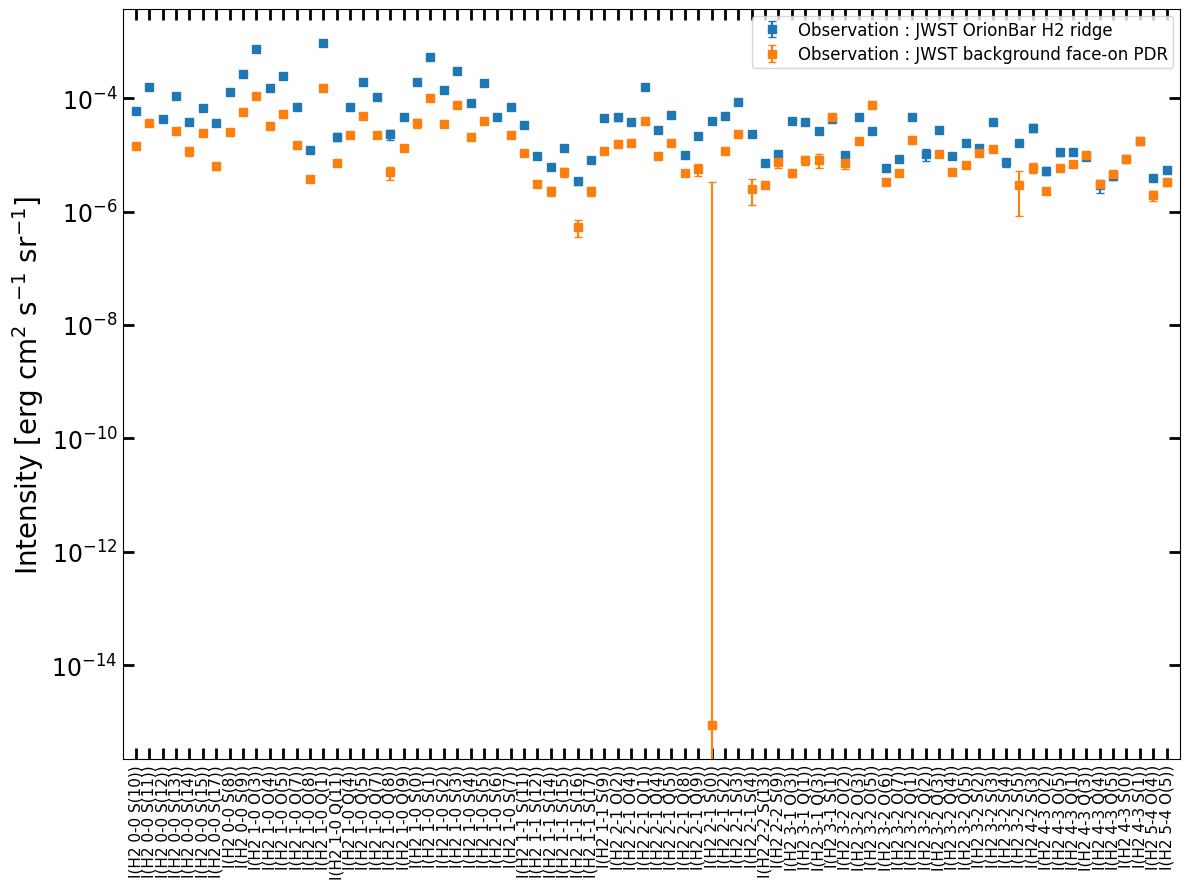

In [4]:
# Example : plotting the intensity diagram for our two positions.

fig = ism.viz_tools.plot_intensity_diagram([JWST_OrionBar_PDR_obs,JWST_Background_PDR_obs],ylabel="Intensity [erg cm$^2$ s$^{-1}$ sr$^{-1}$]")

If you don't want to keep all of the observed quantities, you can use the `.reduce_observables(name_list)` method, providing in name_list the list of quantity names you want to keep.

---------------------------------------------------------
Single-pointing observation                              
                                                         
ID : JWST OrionBar H2 ridge
Number of observables : 4           
                                                         
Observable                                 Value        Error    Error_type
I(H2 1-1 S(15))                            1.35E-05     1.44E-06 normal      
I(H2 3-2 Q(3))                             2.73E-05     2.50E-06 normal      
I(H2 1-0 O(4))                             1.52E-04     1.24E-05 normal      
I(H2 4-3 Q(4))                             2.91E-06     7.52E-07 normal      
                                                         
Additionnal infos:                                       
None
---------------------------------------------------------


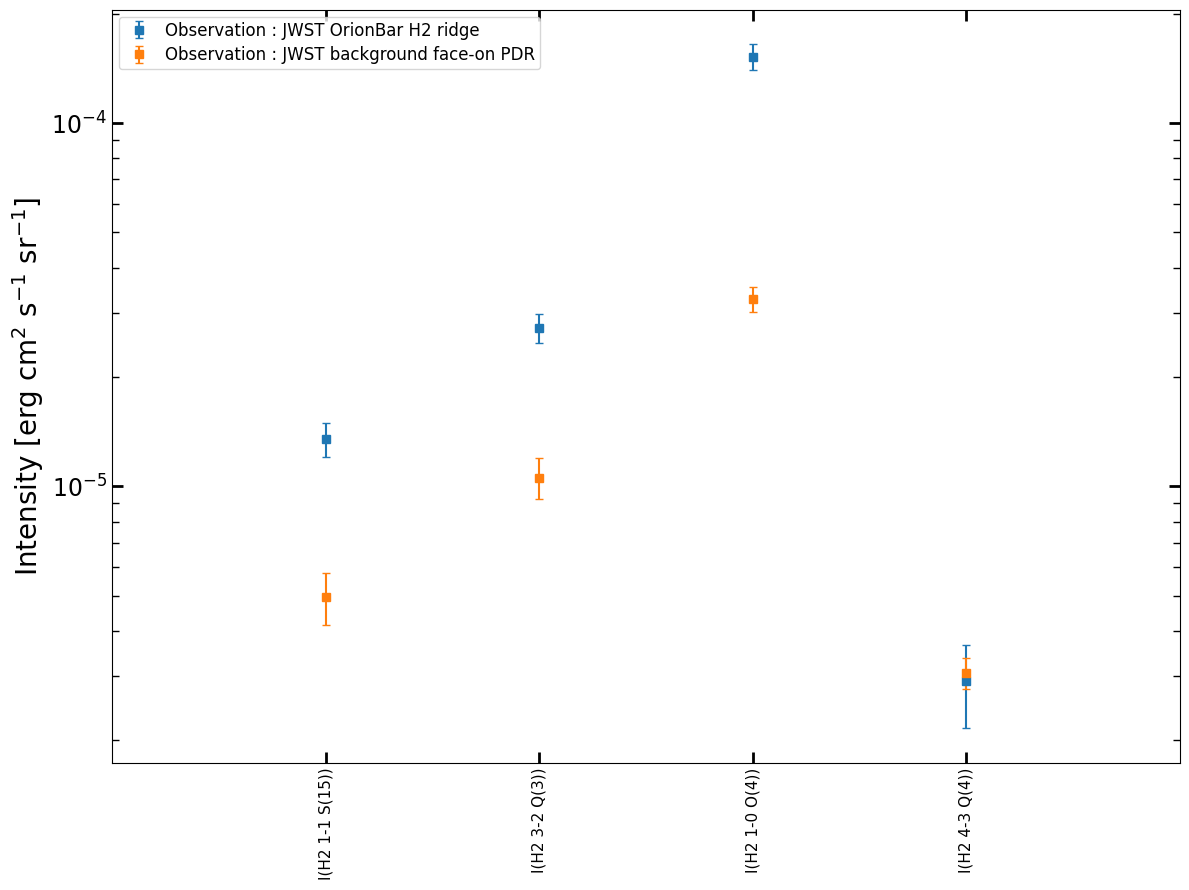

In [5]:
# Example : we reduce our two observations, keeping only 4 lines

JWST_OrionBar_PDR_obs.reduce_observables(['I(H2 1-1 S(15))','I(H2 3-2 Q(3))','I(H2 1-0 O(4))','I(H2 4-3 Q(4))'])
JWST_Background_PDR_obs.reduce_observables(['I(H2 1-1 S(15))','I(H2 3-2 Q(3))','I(H2 1-0 O(4))','I(H2 4-3 Q(4))'])

# We plot the intensity diagram again, which now displays only the 4 lines we have kept

fig = ism.viz_tools.plot_intensity_diagram([JWST_OrionBar_PDR_obs,JWST_Background_PDR_obs],ylabel="Intensity [erg cm$^2$ s$^{-1}$ sr$^{-1}$]")

# A print shows that our observation now indeed only contains the 4 lines we want.
print(JWST_OrionBar_PDR_obs)

When comparing to models, the observational error bars are sometimes much smaller than the accuracy we can reasonnably expect from the model itself. This tends to constrain the fit too unreasonably strongly, and can hinder the search for a good fit, especially when one or a few of the observed lines have much smaller errorbars than the others (as the fit will then focus on fitting these lines with unreasonably large accuracy while completely sacrificing the fit on the other lines).

It is thus often useful to set a minimal multiplicative error level on all lines (typically a 10-40% errors to represent the model innaccuracies). This can be done using the `.set_multiplicative_noise_threshold(threshold=0.2)` method of the `Observation` objects. When the current error level for a line is lower than the specified threshold, this methods replace it with multiplicative error with the threshold level. The threshold level is specified as a fraction (i.e. 0.2 corresponds a lognormal multiplicative noise with a $\sigma$ corresponding to 20% of the observed value).

---------------------------------------------------------
Single-pointing observation                              
                                                         
ID : JWST OrionBar H2 ridge
Number of observables : 4           
                                                         
Observable                                 Value        Error    Error_type
I(H2 1-1 S(15))                            1.35E-05     1.44E-06 normal      
I(H2 3-2 Q(3))                             2.73E-05     1.10E+00 lognormal   
I(H2 1-0 O(4))                             1.52E-04     1.10E+00 lognormal   
I(H2 4-3 Q(4))                             2.91E-06     7.52E-07 normal      
                                                         
Additionnal infos:                                       
None
---------------------------------------------------------


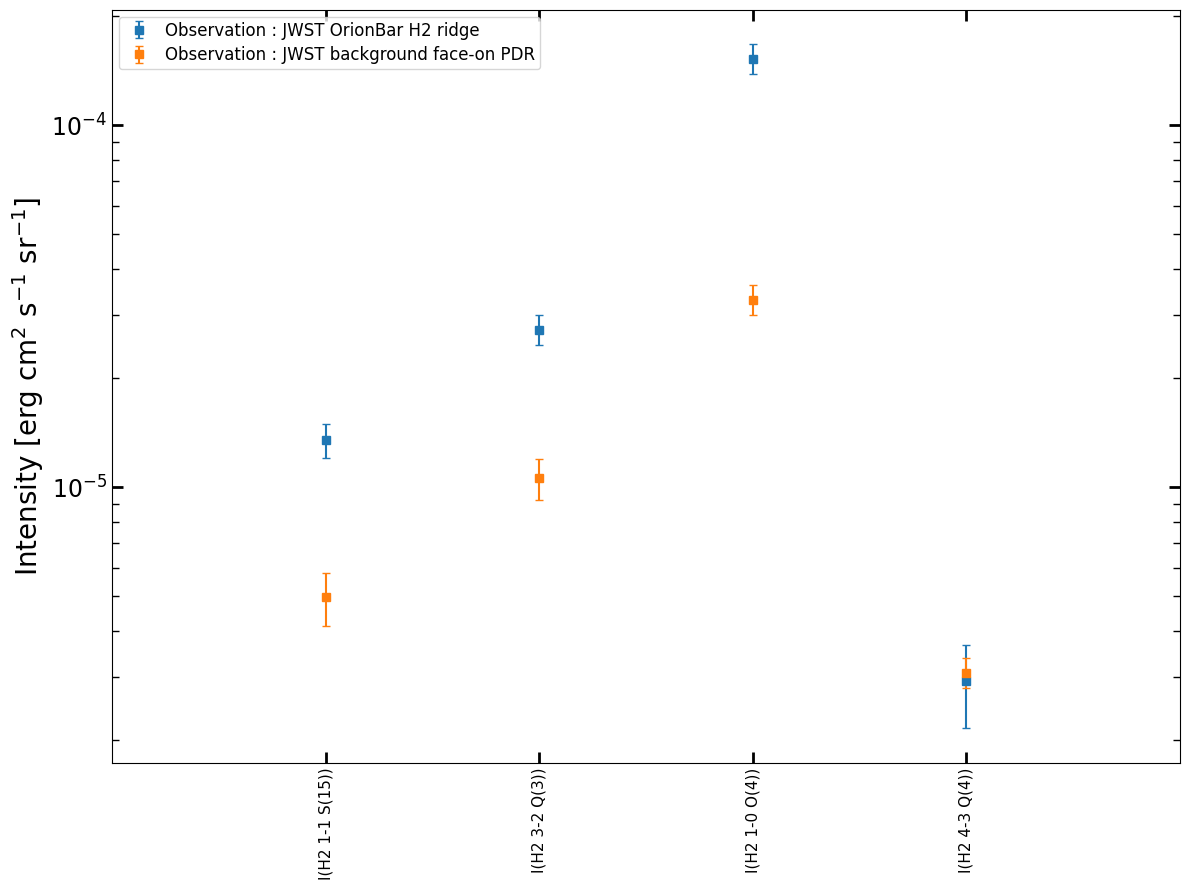

In [6]:
# Example : we set a minimum multiplicative error level of 10%

JWST_OrionBar_PDR_obs.set_multiplicative_noise_threshold(threshold=0.1)
JWST_Background_PDR_obs.set_multiplicative_noise_threshold(threshold=0.1)

# we print the first observation object :

print(JWST_OrionBar_PDR_obs)
# note that for the first and last lines, the error level was alaready larger than 10% and was thus not modified.

# we plot again the observations with the modified errorbars :

fig = ism.viz_tools.plot_intensity_diagram([JWST_OrionBar_PDR_obs,JWST_Background_PDR_obs],ylabel="Intensity [erg cm$^2$ s$^{-1}$ sr$^{-1}$]")


# The `Model_grid` and `Model` classes

Two types of objects are used to store model results :
- a `Model_grid` object stores the results of a full grid of models
- a `Model` object stores the results of one single model

A `Model_grid` object can be read from an ASCII file containing :
- a header (with all its lines starting with '#') of the form:
```
##===================================================================================================================================
## DataFile        : Line intensities from PDR grid - Angle : 00 degrees
## Code            : PDR 1.7 dev - revision 2197 - 211029
## Grid            : - Constant Pressure
##                   - Exact transfer, H2 20 levels
##                   - Standard grains
## Production date : 16/01/2022
##===================================================================================================================================
# 1  Pressure   
# 2  radm
# 3  AVmax
# 4  inta_00_h2_v0_j2__v0_j0
# 5  inta_00_h2_v0_j3__v0_j1
# 6  inta_00_h2_v0_j4__v0_j2
# 7  inta_00_h2_v0_j5__v0_j3
# 8  inta_00_h2_v0_j6__v0_j4
# 9  inta_00_h2_v0_j7__v0_j5
# 10  inta_00_h2_v0_j8__v0_j6
# 11  inta_00_h2_v0_j9__v0_j7
# 12  inta_00_h2_v0_j10__v0_j8
# 13  inta_00_h2_v0_j11__v0_j9
...
```
where the part between lines of '===' is considered as comment lines providing informations about the grid (and will be stored in the `Model_grid` object), and the comment lines that follow it give one quantity name per line
- A table of values, with one line for each model of the grid, and one column for each quantity listed in the second part of the header.

To read a model grid from an ASCII file, we use the function

`ism.Model_grid.from_ASCII_file(file_name, number_of_parameters, grid_name)`

where number_of_parameters gives the number of columns that are to be treated as grid parameters (e.g. P_th, G_0, etc.) and not as observable quantities. The columns containing the grid parameters are always assumed to be first, and all the columns that follow are assumed to be observable quantities.

In [7]:
# Example : reading the result of a grid of models with 3 parameters (P, G0, Av)

my_grid = ism.Model_grid.from_ASCII_file("./Test_data/P17G3_P_IntH2All_A00_abs.dat",3,"P17G3_P")

Starting to read header...
Reading data array...
Model grid loaded successfully.


Similarly to `Observation` objects, a print() or .summary() can be used to display a summary of a `Model_grid` object.

In [8]:
my_grid.summary()
# equivalent to
#print(my_grid)

---------------------------------------------------------
Model grid                                               
Grid ID : P17G3_P                code version :  PDR 1.7 dev - revision 2197 - 211029

Number of models : 1372   number of parameters : 3      number of observables : 3282  
                                                         
Parameters :                                             
name                             min_value  max_value nb_values
Pressure                         1.00E+05    1.00E+09 13  
radm                             1.00E+00    1.00E+05 17  
AVmax                            1.00E+00    4.00E+01 10  
                                                         
Observables :                                            
name                             min_value  max_value
inta_00_h2_v0_j2__v0_j0          6.44E-13   5.79E-05
inta_00_h2_v0_j3__v0_j1          1.32E-11   5.99E-04
inta_00_h2_v0_j4__v0_j2          1.22E-10   7.42E-04
inta_00_h2_v0_j5__v0_j3 

### Extracting a `Model` object from a `Model_grid` object
Knowing the specific parameter values of one model contained in the grid, it is possible to get this model as a separate `Model` object using the method `.get_model(parameter_value_array)` of the `Model_grid` (with `parameter_value_array` being a list or a 1D numpy array containing the parameter values of the model to extract -- the order of parameters can be seen with a print() of the `Model_grid` object as above).

If you want to know the precise values that are present in the grid for each parameter, you can use the `.get_unique_parameter_values()` method of the `Model_grid` object, which returns a dictionnary giving for each parameter name the list of unique values present in the grid (warning: this does not guarantee that all combinations of the existing values of the parameters exist in the grid, as the grid is not necessarily a rectangular grid).

In [9]:
# Example : extract two models from the grid, for P=1E8 and P=1E7 (both with G0=1E4 and Av=10)

my_model1 = my_grid.get_model([1.0e+08,1.0e+04,1.0e+01])
my_model2 = my_grid.get_model([1.0e+07,1.0e+04,1.0e+01])

print(my_model1)

# to know the parameter values present in the grid
unique_param_value_dict = my_grid.get_unique_parameter_values()
print(unique_param_value_dict)

---------------------------------------------------------
Model                                                    
                                                         
From grid : P17G3_P                code version :  PDR 1.7 dev - revision 2197 - 211029

Number of parameters : 3           number of observables : 3282      
No scaling factor.                                        
                                                         
Parameters :                                             
Pressure                         1.00E+08
radm                             1.00E+04
AVmax                            1.00E+01
                                                         
Observables :                                            
inta_00_h2_v0_j2__v0_j0          2.90E-05
inta_00_h2_v0_j3__v0_j1          3.09E-04
inta_00_h2_v0_j4__v0_j2          4.56E-04
inta_00_h2_v0_j5__v0_j3          1.54E-03
inta_00_h2_v0_j6__v0_j4          5.28E-04
...
inta_00_h2_v12_j1__v9_j1         1.1

For both `Model_grid` and `Model` objects, it is possible to discard part of the observables with the same syntax as for `Observation` objects (i.e using the `.reduce_observables()` method).

In [10]:
# Example : reducing the observable list of our two model

# defining the lines we want to keep
my_line_list = ["inta_00_h2_v5_j7__v4_j5",
                "inta_00_h2_v6_j11__v2_j13",
                "inta_00_h2_v9_j2__v5_j0",
                "inta_00_h2_v10_j4__v5_j6",
                "inta_00_h2_v11_j7__v2_j7"]

# reducing our two models
my_model1.reduce_observables(my_line_list)
my_model2.reduce_observables(my_line_list)

# as shown with a print() our model now has 5 lines only
print(my_model1)


# Alternatively, one could have reduced the observable list for the full grid before extracting the two models:

#my_grid.reduce_observables(my_line_list)
#my_model1 = my_grid.get_model(np.array([1.0e+08,1.0e+04,1.0e+01]))
#my_model2 = my_grid.get_model(np.array([1.0e+07,1.0e+04,1.0e+01]))
#print(my_model1)

# warning : if you have uncommented the alternative example, my_grid has been modified and some of the 
# following cells might not work correctly anymore.
# Comment it again and re-run the notebook from the start.

---------------------------------------------------------
Model                                                    
                                                         
From grid : P17G3_P                code version :  PDR 1.7 dev - revision 2197 - 211029

Number of parameters : 3           number of observables : 5         
No scaling factor.                                        
                                                         
Parameters :                                             
Pressure                         1.00E+08
radm                             1.00E+04
AVmax                            1.00E+01
                                                         
Observables :                                            
inta_00_h2_v5_j7__v4_j5          3.77E-07
inta_00_h2_v6_j11__v2_j13        3.00E-08
inta_00_h2_v9_j2__v5_j0          1.58E-07
inta_00_h2_v10_j4__v5_j6         1.91E-10
inta_00_h2_v11_j7__v2_j7         5.17E-11
----------------------------------------

Alternatively, you can extract a model by giving parameter values which are not necessarily present in the grid to the `.get_nearest_model(parameter_value_array)` method, and it will then extract the closest model in the grid (by default by euclidian distance on log10 of parameters).

In [11]:
# Example : this finds the same model that we stored in model1 above.

model3 = my_grid.get_nearest_model([9.23E7,1.19E4,8.78])

print(model3)

---------------------------------------------------------
Model                                                    
                                                         
From grid : P17G3_P                code version :  PDR 1.7 dev - revision 2197 - 211029

Number of parameters : 3           number of observables : 3282      
No scaling factor.                                        
                                                         
Parameters :                                             
Pressure                         1.00E+08
radm                             1.00E+04
AVmax                            1.00E+01
                                                         
Observables :                                            
inta_00_h2_v0_j2__v0_j0          2.90E-05
inta_00_h2_v0_j3__v0_j1          3.09E-04
inta_00_h2_v0_j4__v0_j2          4.56E-04
inta_00_h2_v0_j5__v0_j3          1.54E-03
inta_00_h2_v0_j6__v0_j4          5.28E-04
...
inta_00_h2_v12_j1__v9_j1         1.1

Intensity diagrams for `Model` objects can be produced using the same function as for `Observation` objects:

`ism.viz_tools.plot_intensity_diagram(list_of_object)`

giving in `list_of_objects` a list of `Model` objects.

Here, having used `.reduce_observables()` on the `Model` objects beforehand is necessary if we don't want a plot showing thousands of lines !

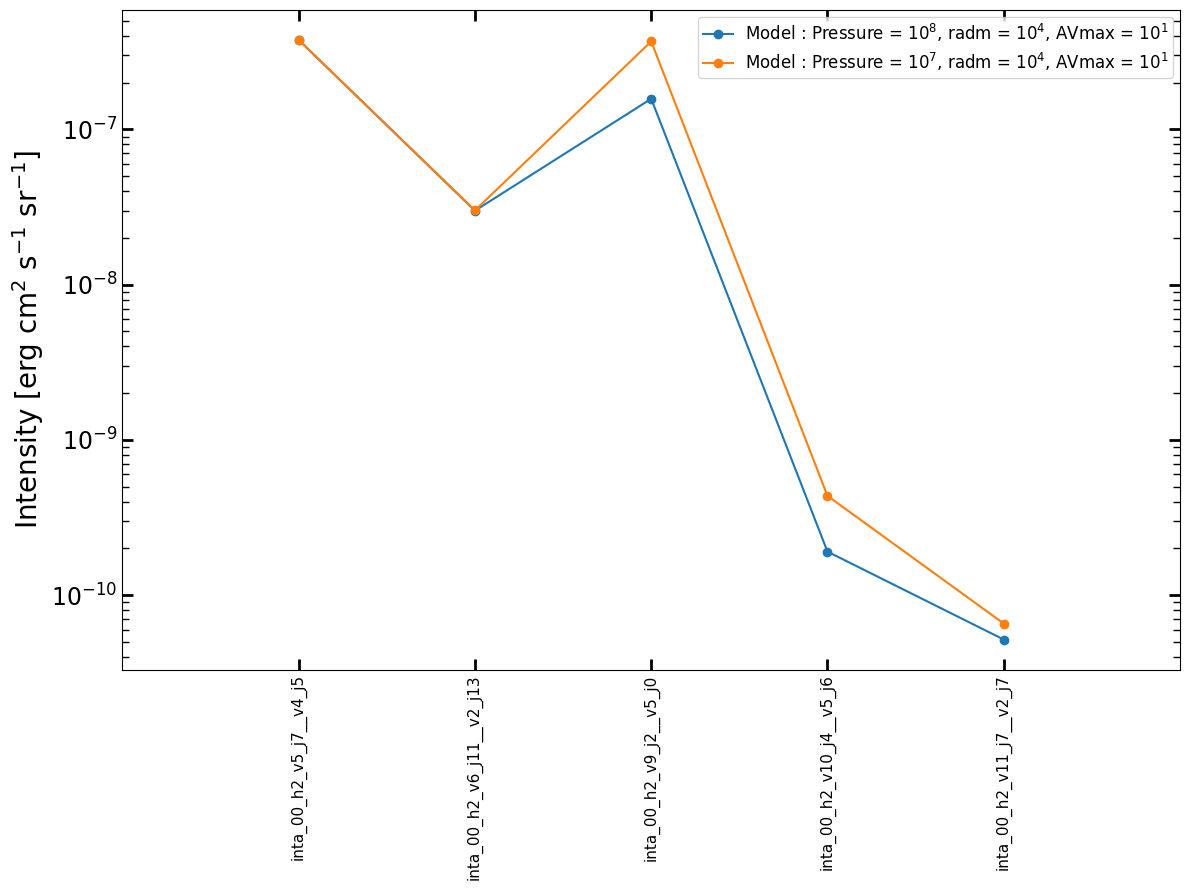

In [12]:
# Example : intensity diagram for the two models that we have extracted

fig = ism.viz_tools.plot_intensity_diagram([my_model1,my_model2],ylabel="Intensity [erg cm$^2$ s$^{-1}$ sr$^{-1}$]")

# note that the labels are generated automatically from the model properties, but can be specified manually with the optional argument labels (this works indifferently for plotting Model and Observation objects) :
#
#fig = ism.viz_tools.plot_intensity_diagram([my_model1,my_model2],labels=["My first model", "My second model"],ylabel="Intensity [erg cm$^2$ s$^{-1}$ sr$^{-1}$]")


## Comparing models and observations

### Translating quantity names
A common problem is that the names used for the observed quantities might differ between the `Observation` object and the `Model` or `Model_grid` objects. To translate the names into a common vocabulary, we use dictionnaries stored into `Translation` objects.

`Translation` objects can be built in two ways :
- they can be read from an ASCII file, usinng the function `ism.Translation.from_ASCII_file(filename)`.
The file should be formatted with one line per observable quantity, and two columns, giving two alternate names for the quantity, separated by a `|` character. For instance the beginning of such a file might look like :

``I(H2 0-0 S(8))  |  I(H2 v=0,J=10->v=0,J=8 angle 00 deg)
I(H2 0-0 S(9))  |  I(H2 v=0,J=11->v=0,J=9 angle 00 deg)
I(H2 0-0 S(10)) |  I(H2 v=0,J=12->v=0,J=10 angle 00 deg)
I(H2 0-0 S(11)) |  I(H2 v=0,J=13->v=0,J=11 angle 00 deg)
I(H2 0-0 S(12)) |  I(H2 v=0,J=14->v=0,J=12 angle 00 deg)
I(H2 0-0 S(13)) |  I(H2 v=0,J=15->v=0,J=13 angle 00 deg)
I(H2 0-0 S(14)) |  I(H2 v=0,J=16->v=0,J=14 angle 00 deg)
I(H2 0-0 S(15)) |  I(H2 v=0,J=17->v=0,J=15 angle 00 deg)
``

In [13]:
# Example : reading a translation dictionnary from a file

name_translation_OrionBarPDR = ism.Translation.from_ASCII_file('./Test_data/name_correspondance_OrionBarPDR.txt')

print(name_translation_OrionBarPDR)
# is equivalent to
#name_translation_OrionBarPDR.summary()

---------------------------------------------------------
Name translation                                         
                                                         
Name : name_correspondance_OrionBarPDR                                        
Number of name pairs: 78            
Name               Translation
I(H2 0-0 S(8))       I(H2 v=0,J=10->v=0,J=8 angle 00 deg)
I(H2 0-0 S(9))       I(H2 v=0,J=11->v=0,J=9 angle 00 deg)
I(H2 0-0 S(10))      I(H2 v=0,J=12->v=0,J=10 angle 00 deg)
I(H2 0-0 S(11))      I(H2 v=0,J=13->v=0,J=11 angle 00 deg)
I(H2 0-0 S(12))      I(H2 v=0,J=14->v=0,J=12 angle 00 deg)
...
I(H2 4-3 Q(5))       I(H2 v=4,J=5->v=3,J=5 angle 00 deg)
I(H2 4-3 S(0))       I(H2 v=4,J=2->v=3,J=0 angle 00 deg)
I(H2 4-3 S(1))       I(H2 v=4,J=3->v=3,J=1 angle 00 deg)
I(H2 5-4 O(4))       I(H2 v=5,J=2->v=4,J=4 angle 00 deg)
I(H2 5-4 O(5))       I(H2 v=5,J=3->v=4,J=5 angle 00 deg)
---------------------------------------------------------


- A dictionnary can also be manually built and then stored into a `Translation` object, using the function `ism.Translation(name,my_dictionnary)` (where name is the name we want to give to this translation, and my_dictionnary is a dictionnary containing pairs of associated names.

In [14]:
# Example : building a translation dictionnary by hand for the Orion Bar JWST observations

# we first re-read our observation file because we have dropped most of the lines previously
JWST_OrionBar_PDR_obs = ism.Observation.from_ASCII_file("./Test_data/OrionBar_JWST_molecular_PDR_intensities.txt","JWST OrionBar H2 ridge")

# we get the list of names used in the observation
name_list = list(JWST_OrionBar_PDR_obs.get_observable_names())

# we build a dictionnary linking a name from the observation to the corresponding name in the model grid
new_name_dict = {}
for x in name_list :
    vup,vlow = x.split(' ')[1].split('-')
    vup,vlow = int(vup),int(vlow)
    Jlow = int(x.split(' ')[-1].split('(')[1].split(')')[0])
    trtype = x.split(' ')[-1].split('(')[0]
    if trtype == 'S' :
        Jup = Jlow+2
    elif trtype == 'O' :
        Jup = Jlow-2
    elif trtype == 'Q' :
        Jup = Jlow
    new_name_dict[x] = f"inta_00_h2_v{vup:d}_j{Jup:d}__v{vlow:d}_j{Jlow:d}"

# We store this dictionnary into a Translation object
my_translation = ism.Translation("my_translation",new_name_dict)

# show a summary
print(my_translation)

---------------------------------------------------------
Name translation                                         
                                                         
Name : my_translation                                        
Number of name pairs: 78            
Name               Translation
I(H2 0-0 S(8))       inta_00_h2_v0_j10__v0_j8
I(H2 0-0 S(9))       inta_00_h2_v0_j11__v0_j9
I(H2 0-0 S(10))      inta_00_h2_v0_j12__v0_j10
I(H2 0-0 S(11))      inta_00_h2_v0_j13__v0_j11
I(H2 0-0 S(12))      inta_00_h2_v0_j14__v0_j12
...
I(H2 4-3 Q(5))       inta_00_h2_v4_j5__v3_j5
I(H2 4-3 S(0))       inta_00_h2_v4_j2__v3_j0
I(H2 4-3 S(1))       inta_00_h2_v4_j3__v3_j1
I(H2 5-4 O(4))       inta_00_h2_v5_j2__v4_j4
I(H2 5-4 O(5))       inta_00_h2_v5_j3__v4_j5
---------------------------------------------------------


`Translation` objects can then be used to change the names of an `Observation` object, a `Model` object, or a `Model_grid` object. They are used to bring several such objects to a common set of observable names so that they can be compared. They can be used in both directions (i.e. the names from which to translate can be either the first or the second name of each pairs), but it must be the same direction for all the quantity names of the object, and all the quantity names of the object must be present in the translation dictionnary (i.e., we cannot translate only part of the names).

All of these objects have a method `.translate_names(translation)` taking a `Translation` object as argument and changing the names of the original object to their alternative name in the translation dictionnary. It will automatically detect which names are currently used and translate into the other name of the pairs.

In [15]:
# Example : translating our observation into the line names used in the models

# a print beforehand shows the old names used
print(JWST_OrionBar_PDR_obs)

# we translate the names
JWST_OrionBar_PDR_obs.translate_names(my_translation)

# a print afterwards shows that the observation now uses the names used in the models
print(JWST_OrionBar_PDR_obs)

---------------------------------------------------------
Single-pointing observation                              
                                                         
ID : JWST OrionBar H2 ridge
Number of observables : 78          
                                                         
Observable                                 Value        Error    Error_type
I(H2 0-0 S(8))                             1.28E-04     9.55E-06 normal      
I(H2 0-0 S(9))                             2.62E-04     7.34E-06 normal      
I(H2 0-0 S(10))                            5.94E-05     3.35E-06 normal      
I(H2 0-0 S(11))                            1.61E-04     8.53E-06 normal      
I(H2 0-0 S(12))                            4.25E-05     2.63E-06 normal      
...
I(H2 4-3 Q(5))                             4.19E-06     6.52E-07 normal      
I(H2 4-3 S(0))                             8.32E-06     4.76E-07 normal      
I(H2 4-3 S(1))                             1.79E-05     2.31E-06 normal      

In [16]:
# Example : translating a model object

# we re-extract the model, as we have dropped most of the lines before
my_model = my_grid.get_model([1.0e+08,1.0e+04,1.0e+01])

# we get the names that are present in the translation objects, and we will then reduce our model to only 
# those quantities (as the others cannot be translated).
# Here the names used by the model are the alternate names (second name of each translation pair), we first get those :
quantity_names = my_translation.get_alternate_names()

# we reduce the model to those quantities only 
my_model.reduce_observables(quantity_names)

print(my_model)
# we now have only the 78 lines present in the observation

# and we finaly translate the model to the names used in the observation
my_model.translate_names(my_translation)

print(my_model)

---------------------------------------------------------
Model                                                    
                                                         
From grid : P17G3_P                code version :  PDR 1.7 dev - revision 2197 - 211029

Number of parameters : 3           number of observables : 78        
No scaling factor.                                        
                                                         
Parameters :                                             
Pressure                         1.00E+08
radm                             1.00E+04
AVmax                            1.00E+01
                                                         
Observables :                                            
inta_00_h2_v0_j10__v0_j8         4.34E-05
inta_00_h2_v0_j11__v0_j9         6.84E-05
inta_00_h2_v0_j12__v0_j10        2.06E-05
inta_00_h2_v0_j13__v0_j11        4.00E-05
inta_00_h2_v0_j14__v0_j12        1.53E-05
...
inta_00_h2_v4_j5__v3_j5          2.0

In [17]:
# Example : we could also translate the whole model grid (after reducing it to only the observable available 
# in the observations).

my_grid.reduce_observables(quantity_names)

my_grid.translate_names(my_translation)

print(my_grid)

---------------------------------------------------------
Model grid                                               
Grid ID : P17G3_P                code version :  PDR 1.7 dev - revision 2197 - 211029

Number of models : 1372   number of parameters : 3      number of observables : 78    
                                                         
Parameters :                                             
name                             min_value  max_value nb_values
Pressure                         1.00E+05    1.00E+09 13  
radm                             1.00E+00    1.00E+05 17  
AVmax                            1.00E+00    4.00E+01 10  
                                                         
Observables :                                            
name                             min_value  max_value
I(H2 0-0 S(8))                   2.59E-09   3.61E-04
I(H2 0-0 S(9))                   6.72E-09   6.52E-04
I(H2 0-0 S(10))                  1.94E-09   1.40E-04
I(H2 0-0 S(11))         

### Comparing intensity diagrams between models and observations

Once we have reduced models and observations to the same list of quantities, using the same quantity names, we can plot them on the same intensity diagram, using the same function as before :

`ism.viz_tools.plot_intensity_diagram(list_of_objects)`

where `list_of_objects` can contain both `Model` and `Observation` objects.

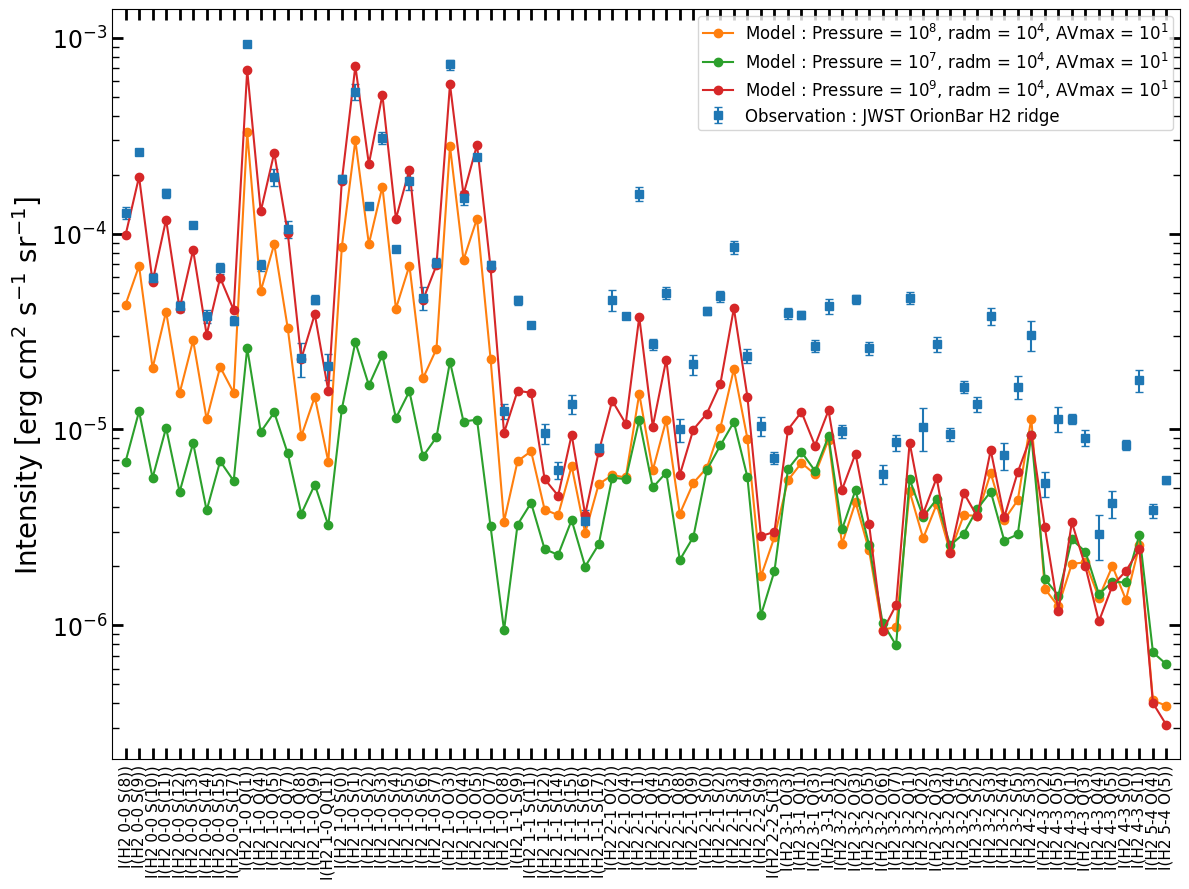

In [18]:
# reload our observation without translating it (because we want to keep the line names it uses)
JWST_OrionBar_PDR_obs = ism.Observation.from_ASCII_file("./Test_data/OrionBar_JWST_molecular_PDR_intensities.txt","JWST OrionBar H2 ridge")

# we get three models from the grid (which has previously been reduced and translated to the lines present in the observations)
my_model1 = my_grid.get_model([1.0e+08,1.0e+04,1.0e+01])
my_model2 = my_grid.get_model([1.0e+07,1.0e+04,1.0e+01])
my_model3 = my_grid.get_model([1.0e+09,1.0e+04,1.0e+01])

# we plot an intensity diagram comparing the three models and the observation
fig = ism.viz_tools.plot_intensity_diagram([JWST_OrionBar_PDR_obs,my_model1,my_model2,my_model3],ylabel="Intensity [erg cm$^2$ s$^{-1}$ sr$^{-1}$]")

# (as before, we can redefine the labels appeariong in the legend with the optional argument labels of plot_intensity_diagram)


### Adjusting a scaling factor for a single model

As geometrical effects (beam filling factor, angle of the line of sight for opticaly thin lines) can be approximated by a single scaling factor on all line intensities, it is often useful to look for the value of this scaling factor that best fits the observations for a given model. This can also capture a systematic calibration error in the observational dataset.

This can be done using the function `ism.fit_tools.find_best_scaling_factor_single_model(my_observation,my_model)`, which return a new, scaled model.

If needed, you can set the bounds on the allowed values of the scaling factor with the optional argument `scaling_factor_bounds` (by default = [0.1,10])

In [19]:
# Build scaled versions of our three models, with scaling factors that best fit the observations/
scaled_model1 = ism.fit_tools.find_best_scaling_factor_single_model(JWST_OrionBar_PDR_obs,my_model1)
scaled_model2 = ism.fit_tools.find_best_scaling_factor_single_model(JWST_OrionBar_PDR_obs,my_model2)
scaled_model3 = ism.fit_tools.find_best_scaling_factor_single_model(JWST_OrionBar_PDR_obs,my_model3)

# printing one of the models and comparing to the original version, we see that the scaling factor
# has been added to the parameters of the models, and that the line intensities now include this 
# scaling factor.
print(my_model1)
# original model has no scaling factor

print(scaled_model1)
# the resulting model has the same parameters, but with a scaling factor on the line intensities

print(scaled_model1.get_scaling_factor()) # to obtain just the value of the scaling factor

---------------------------------------------------------
Model                                                    
                                                         
From grid : P17G3_P                code version :  PDR 1.7 dev - revision 2197 - 211029

Number of parameters : 3           number of observables : 78        
No scaling factor.                                        
                                                         
Parameters :                                             
Pressure                         1.00E+08
radm                             1.00E+04
AVmax                            1.00E+01
                                                         
Observables :                                            
I(H2 0-0 S(8))                   4.34E-05
I(H2 0-0 S(9))                   6.84E-05
I(H2 0-0 S(10))                  2.06E-05
I(H2 0-0 S(11))                  4.00E-05
I(H2 0-0 S(12))                  1.53E-05
...
I(H2 4-3 Q(5))                   2.0

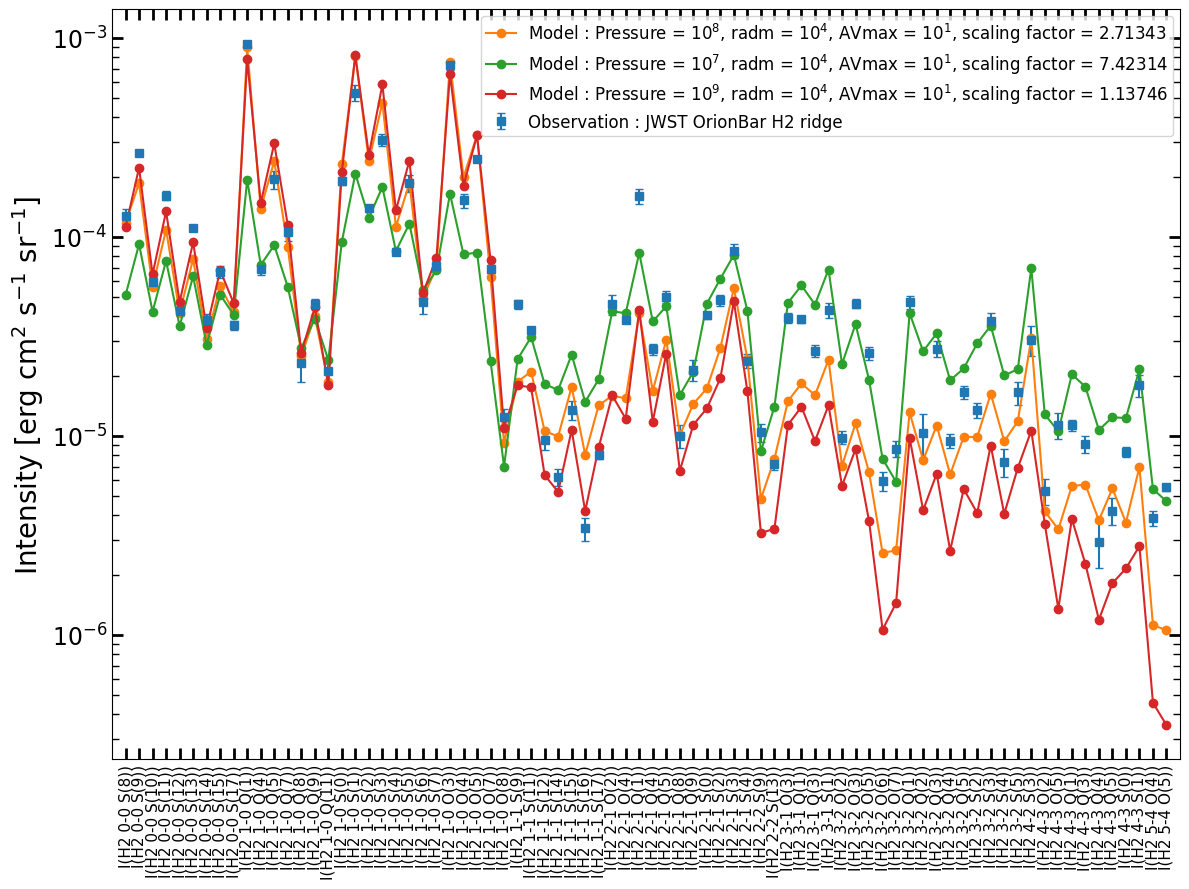

In [20]:
# And we can then plot the comparison of the scaled models to the observation

fig = ism.viz_tools.plot_intensity_diagram([JWST_OrionBar_PDR_obs,scaled_model1,scaled_model2,scaled_model3],ylabel="Intensity [erg cm$^2$ s$^{-1}$ sr$^{-1}$]")



## Finding best-fit in-grid model

We can then search the model grid for the model that best fits the observation (searching only among the models that are present in the grid, without interpolation between them).

This can be done using the function `ism.fit_tools.find_best_model_in_grid(my_obs,my_grid)`, which returns the best model (with an adjusted scaling factor, unless you specify the optional argument `with_scaling_factor=False`), and the corresponding value of the cost function (by default a reduced chi2).

In [21]:
# Find best model in grid
best_model, best_chi2 = ism.fit_tools.find_best_model_in_grid(JWST_OrionBar_PDR_obs,my_grid)

# print value of chi2 for the best model and model summary
print("Best chi2 found in grid:\n",best_chi2)
print(best_model)

Best chi2 found in grid:
 62.537148071873844
---------------------------------------------------------
Model                                                    
                                                         
From grid : P17G3_P                code version :  PDR 1.7 dev - revision 2197 - 211029

Number of parameters : 3           number of observables : 78        
With scaling factor.
                                                         
Parameters :                                             
Pressure                         1.00E+08
radm                             3.50E+03
AVmax                            1.00E+00
(scaling_factor                  5.20E+00)
                                                         
Observables (scaled) :                                            
I(H2 0-0 S(8))                   1.16E-04
I(H2 0-0 S(9))                   1.93E-04
I(H2 0-0 S(10))                  6.47E-05
I(H2 0-0 S(11))                  1.23E-04
I(H2 0-0 S(12))        

The chi2 value (or other cost function) for any model can also be computed using the function `ism.fit_tools.compute_cost_function_model(my_observation,my_model)` (by default a reduced chi2 as well).

In [22]:
# recomputing the chi2 of the best model
print("Best chi2 :",ism.fit_tools.compute_cost_function_model(JWST_OrionBar_PDR_obs,best_model))

Best chi2 : [62.53714807]


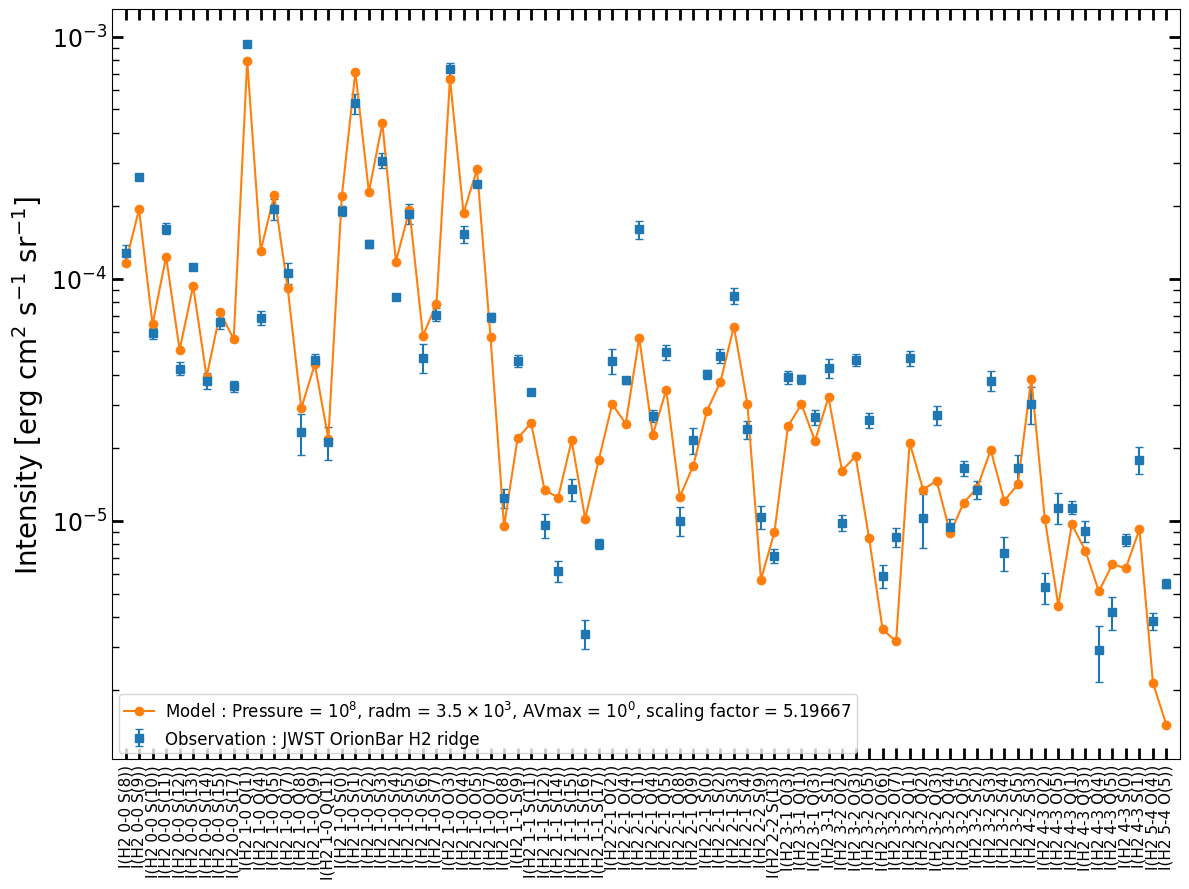

In [23]:
# Plot the best model found in comparison with the observation

fig = ism.viz_tools.plot_intensity_diagram([JWST_OrionBar_PDR_obs,best_model],ylabel="Intensity [erg cm$^2$ s$^{-1}$ sr$^{-1}$]")#,normalization='inta_00_h2_v2_j1__v1_j1')


### Finding the best-fitting interpolated model

For a more detailed estimation of the best fitting model, we can build an interpolation of 
the model grid, and find the best fitting parameters based on this approximation. This "interpolation" might 
actually be only an approximation (as thoses can sometimes be more accurate using e.g. neural networks).

An approximator of a model grid is stored in a `Grid_approximator` object. A `Grid_approximator` object can 
be built from a `Model_grid` using the function `ism.Grid_approximator.interpolate_from_grid(my_grid)`.

The interpolation is done by default with RBF interpolation on the log of the values. It can be changed with the optional argument `interpolator_type`. The possible values are `"Linear"`,`"LogLinear"`, `"LogRBF"` (RBF interpolation on logarithms of values, using a quintic kernel), and `"ISMFIT"` (which uses the interpolation method from ISMFIT: use quintic log RBF to make the grid regular, and then use fast Log-linear interpolation). `"LogRBF"` is the most accurate, `"ISMFIT"` the fastest while still reasonably accurate.

In [24]:
# We build an approximator of our grid

my_approximator = ism.Grid_approximator.interpolate_from_grid(my_grid)

# an approximator object has no summary() method or print() function.

  0%|          | 0/78 [00:00<?, ?it/s]

We can then search for the best fitting parameters using the function `` ism.fit_tools.find_best_interpolated_model(my_obs,my_approximator,N_repetitions=5)``
If `N_repetitions` is larger than 1, the minimization is repeated `N_repetitions` times starting from random initial conditions, and the best minimum among the `N_repetitions` is kept (this helps escaping bad local minima).

In [25]:
# Find best interpolated model
best_model2, best_chi2 = ism.fit_tools.find_best_interpolated_model(JWST_OrionBar_PDR_obs,my_approximator,N_repetitions=5)

# print the value of the best chi2
print("Best chi2 value found ",best_chi2,"\n")

# print summary of the best model
print(best_model2)

# note that the fact that this model is only an interpolated model is displayed in the summary.


  0%|          | 0/5 [00:00<?, ?it/s]

Restart 0 , best chi2 found = 637.413
Restart 1 , best chi2 found = 62.357


/Users/ebron/Library/Python/3.10/lib/python/site-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Restart 2 , best chi2 found = 65.299
Restart 3 , best chi2 found = 62.407
Restart 4 , best chi2 found = 62.382
5 out of the 5 restarts converged successfully.

Best chi2 value found  62.35723484796731 

---------------------------------------------------------
Interpolated model                                       
                                                         
From grid : P17G3_P                code version :  PDR 1.7 dev - revision 2197 - 211029

Number of parameters : 3           number of observables : 78        
With scaling factor.
                                                         
Parameters :                                             
Pressure                         9.40E+07
radm                             3.01E+03
AVmax                            1.26E+01
(scaling_factor                  5.50E+00)
                                                         
Observables (scaled) :                                            
I(H2 0-0 S(8))                   

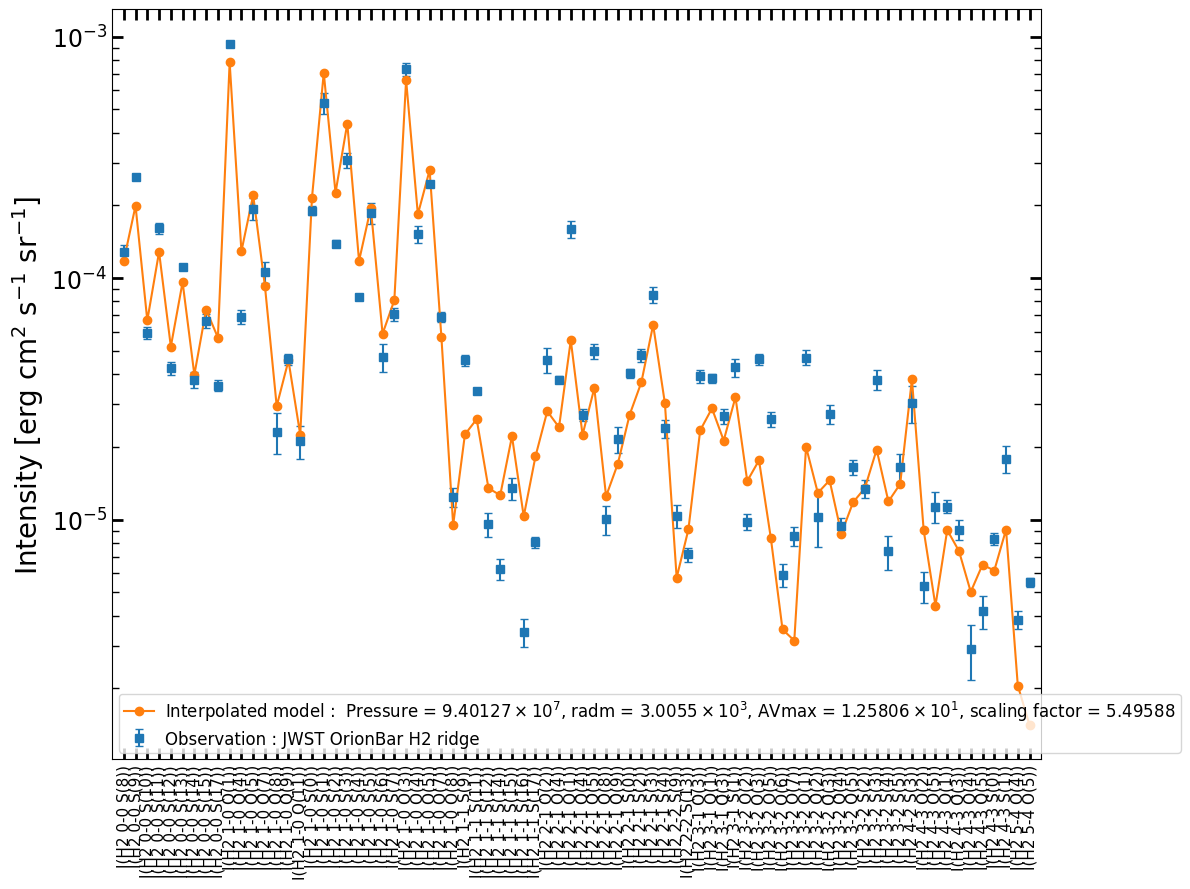

In [26]:
# And we plot the best interpolated model found (which here is actually identical to the best model in grid)

fig = ism.viz_tools.plot_intensity_diagram([JWST_OrionBar_PDR_obs,best_model2],ylabel="Intensity [erg cm$^2$ s$^{-1}$ sr$^{-1}$]")#,normalization='inta_00_h2_v2_j1__v1_j1')


Based on a `Grid_approximator` object, we can also visualize the goodness of fit (by default the reduced chi2) in the parameter space, showing 2D cuts in parameter spaces (fixing the other parameters at their best fit values). 

This is done using the function `ism.viz_tools.fit_quality_contour_plots(my_approximator,my_obs,best_model)`.

  0%|          | 0/16 [00:00<?, ?it/s]

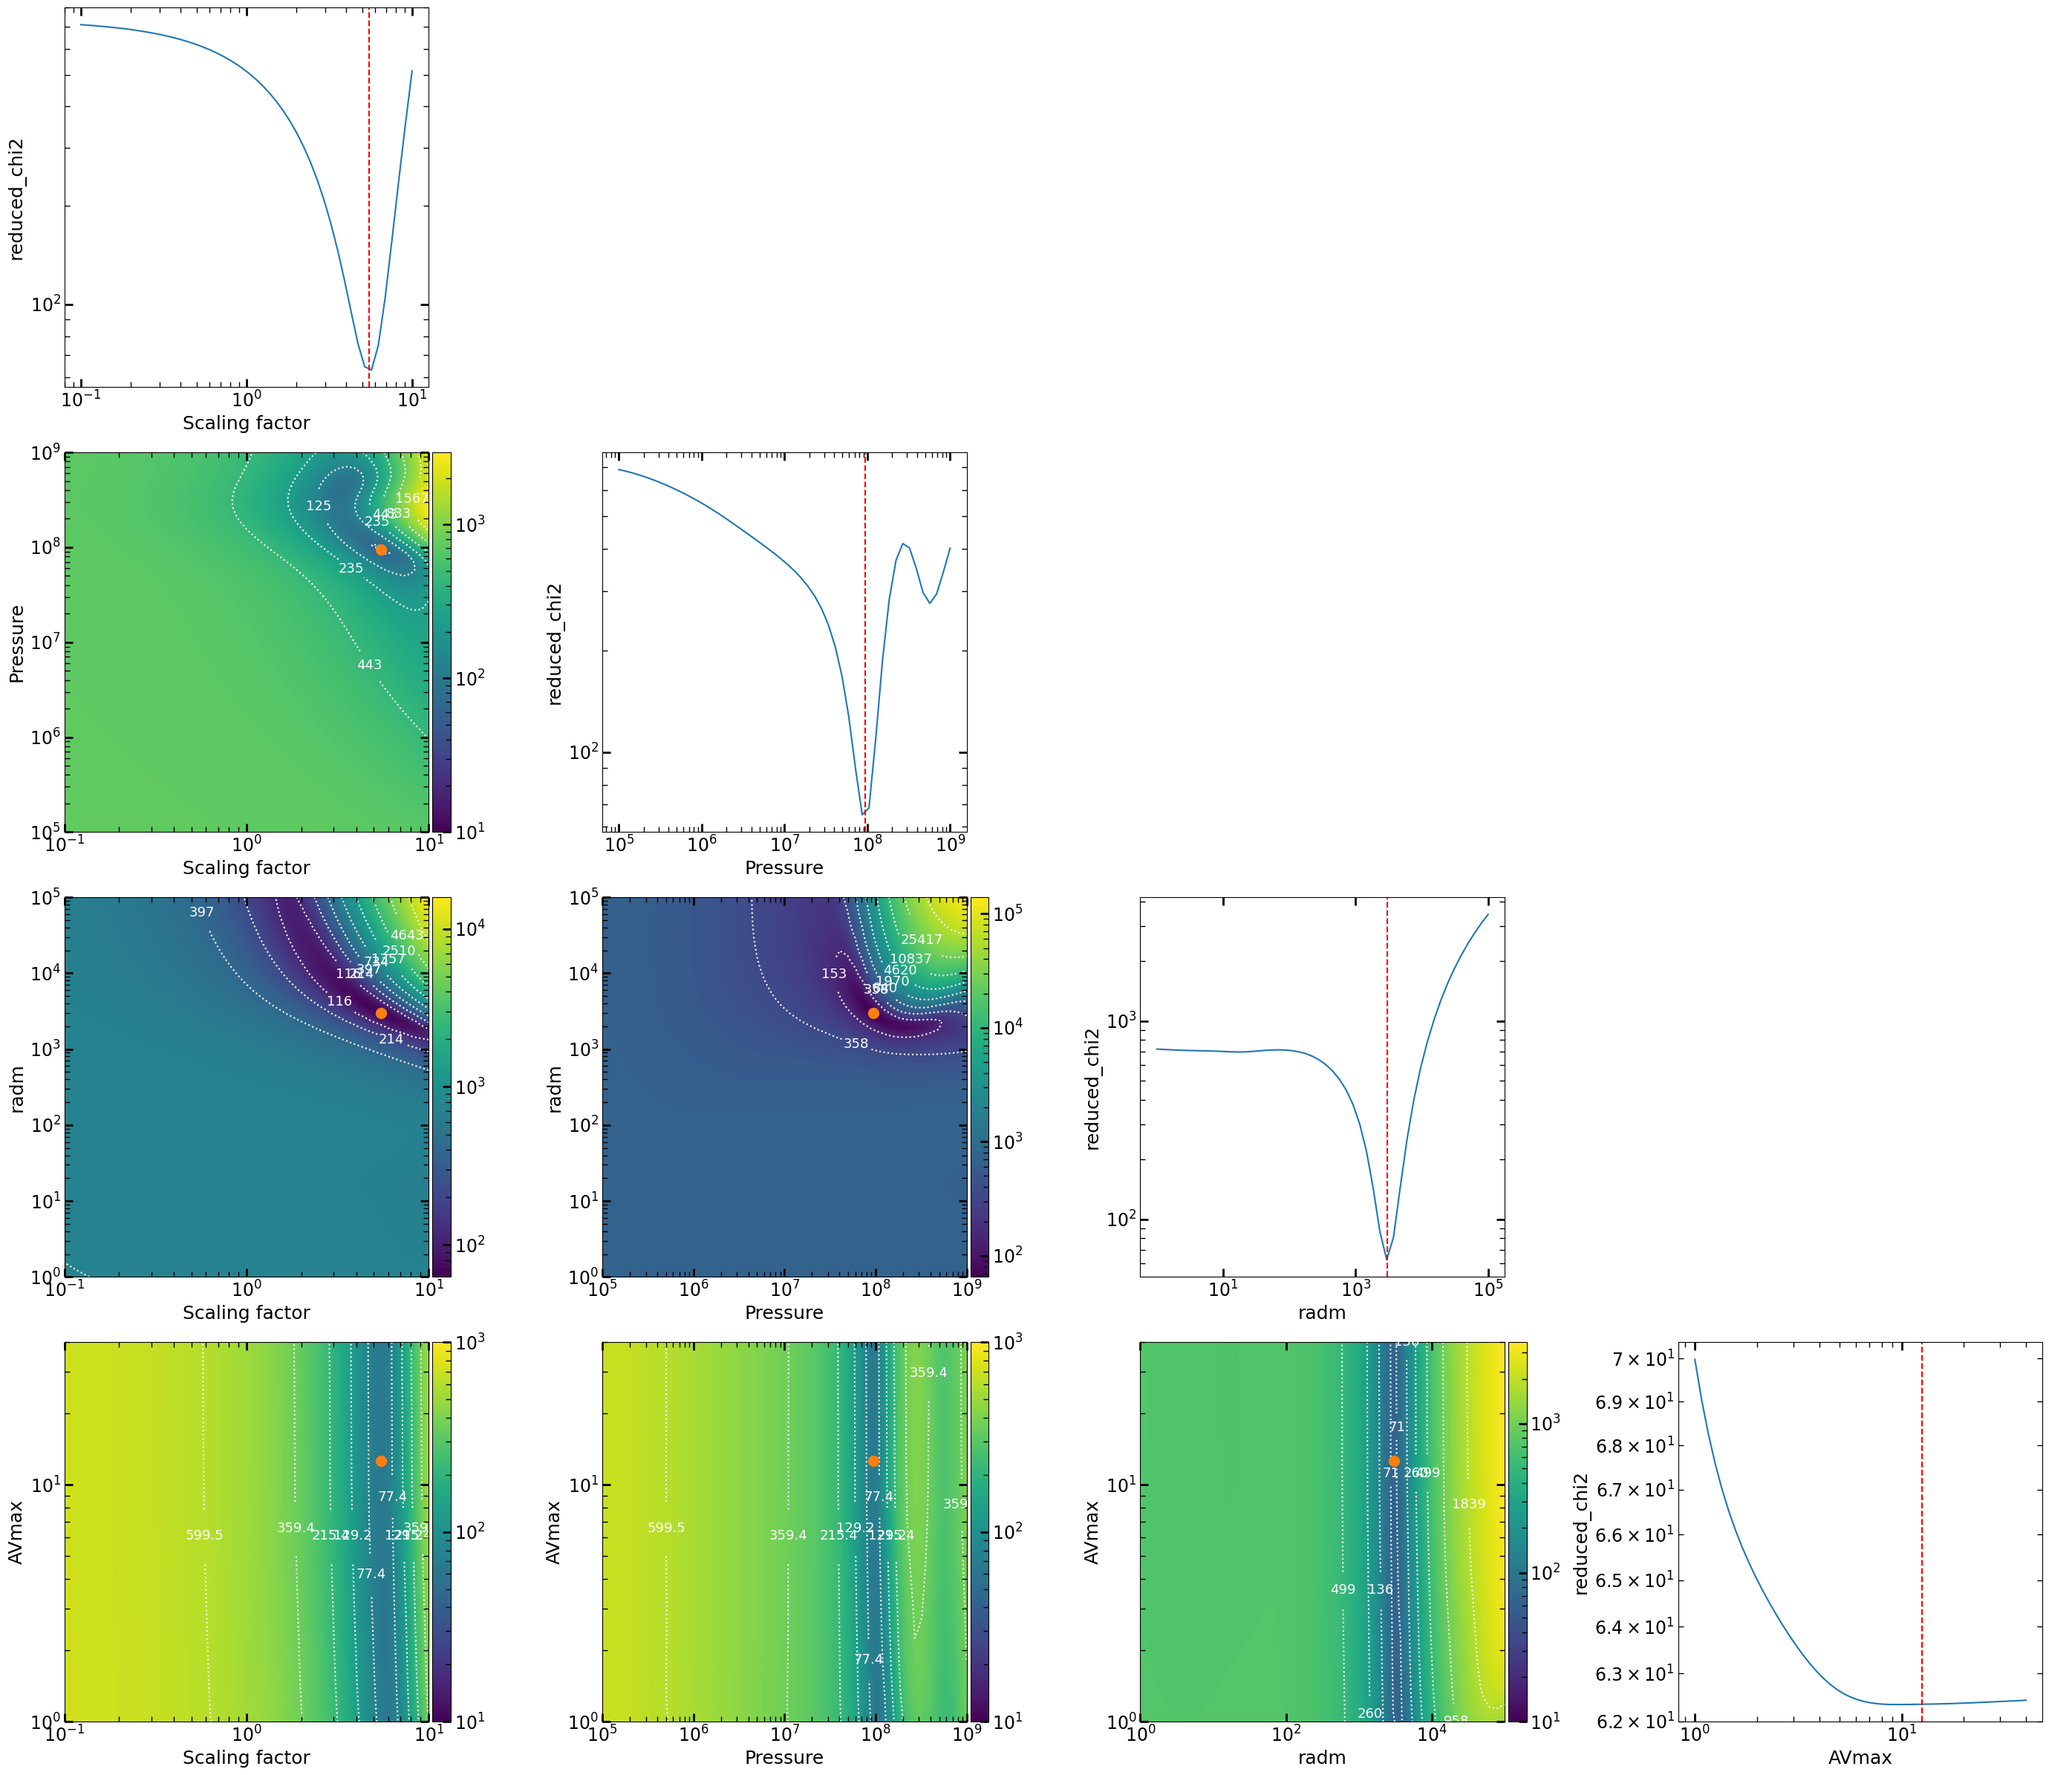

In [27]:
# Plotting the chi2 maps in parameter space

ism.viz_tools.fit_quality_contour_plots(my_approximator,JWST_OrionBar_PDR_obs,best_model2)

# we can save the figure to disk if necessary
plt.savefig("test_chi2_contour_plots.pdf")